In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Step 1:Handling Missing Values

the three rules :

1.if mv<3 then use dropna

2.if mv is between 3-30% then fillna

3.if mv>30% drop column

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
percent=df[df.columns].isnull().sum()/df.shape[0]*100
percent
for i in df.columns:
    print(i)
    print(percent[i])

id
0.0
gender
0.0
age
0.0
hypertension
0.0
heart_disease
0.0
ever_married
0.0
work_type
0.0
Residence_type
0.0
avg_glucose_level
0.0
bmi
3.9334637964774952
smoking_status
0.0
stroke
0.0


In [8]:
from sklearn.impute import SimpleImputer

for i in df.columns:
    print(i)
    if percent[i]<3:
        print(f"Percentange of null value is {percent[i]}")
        df.dropna(subset=[i],inplace=True)
    elif percent[i]>=3 and percent[i]<30:
        print(f"Percentange of null value is {percent[i]}")
        col=df.select_dtypes([int,float]).columns
        ki=SimpleImputer(missing_values=np.nan,strategy="mean")
        df[col]=ki.fit_transform(df[col])
    elif percent[i]>=30:
        print(f"Percentange of null value is {percent[i]}")
        df.drop(i,axis="columns",inplace=True)
        

id
Percentange of null value is 0.0
gender
Percentange of null value is 0.0
age
Percentange of null value is 0.0
hypertension
Percentange of null value is 0.0
heart_disease
Percentange of null value is 0.0
ever_married
Percentange of null value is 0.0
work_type
Percentange of null value is 0.0
Residence_type
Percentange of null value is 0.0
avg_glucose_level
Percentange of null value is 0.0
bmi
Percentange of null value is 3.9334637964774952
smoking_status
Percentange of null value is 0.0
stroke
Percentange of null value is 0.0


In [9]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046.0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.600000,formerly smoked,1.0
1,51676.0,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1.0
2,31112.0,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.500000,never smoked,1.0
3,60182.0,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.400000,smokes,1.0
4,1665.0,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,28.893237,never smoked,0.0
5106,44873.0,Female,81.0,0.0,0.0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0.0
5107,19723.0,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0.0
5108,37544.0,Male,51.0,0.0,0.0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0.0


In [10]:
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046.0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.600000,formerly smoked,1.0
1,51676.0,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1.0
2,31112.0,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.500000,never smoked,1.0
3,60182.0,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.400000,smokes,1.0
4,1665.0,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1.0
5,56669.0,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1.0
6,53882.0,Male,74.0,1.0,1.0,Yes,Private,Rural,70.09,27.400000,never smoked,1.0
7,10434.0,Female,69.0,0.0,0.0,No,Private,Urban,94.39,22.800000,never smoked,1.0
8,27419.0,Female,59.0,0.0,0.0,Yes,Private,Rural,76.15,28.893237,Unknown,1.0
9,60491.0,Female,78.0,0.0,0.0,Yes,Private,Urban,58.57,24.200000,Unknown,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   float64
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   float64
 4   heart_disease      5110 non-null   float64
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   float64
dtypes: float64(7), object(5)
memory usage: 519.0+ KB


### Step 2:Handling Outliers

1.Feature & Response should be saperated from dataset

2.Feature and Response should be numeric in nature

3.Feature and Response should be in a proper shape & dimension

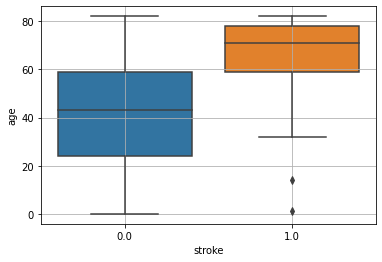

In [12]:
sns.boxplot(data=df,x='stroke',y='age')
plt.grid()
plt.show()


In [13]:
def getquan(colum):
    q1=df[colum].quantile(0.25)
    q3=df[colum].quantile(0.75)
    iqr=q3-q1
    uplim=q3+(1.5*iqr)
    lowlim=q1-(1.5*iqr)
    return uplim,lowlim

In [14]:
getquan("age")

(115.0, -29.0)

In [15]:
out=df[((df.age>115.0)|(df.age<-29.0)&(df.stroke==0.0))]
out

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


##### Here we can observe that there are not that much outliers and there is no need to remove the outliers also after applying the
##### the methods we came to this conclusion.

### Step 3:Handling Skewness

In [16]:
from scipy.stats import skew

In [17]:
numdata=df.select_dtypes([int,float]).columns
numdata

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

Skewness of id is -0.019912979190701046


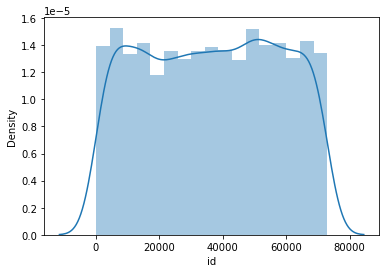

Skewness of age is -0.1370593225984694


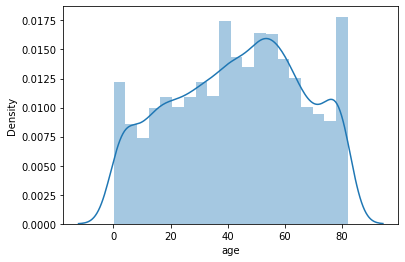

Skewness of hypertension is 2.7153916581245294


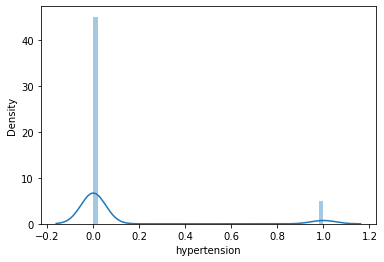

Skewness of heart_disease is 3.947243966661894


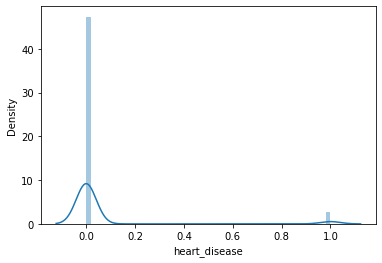

Skewness of avg_glucose_level is 1.5722838665030459


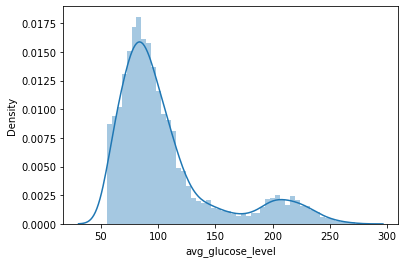

Skewness of bmi is 1.0767160713842094


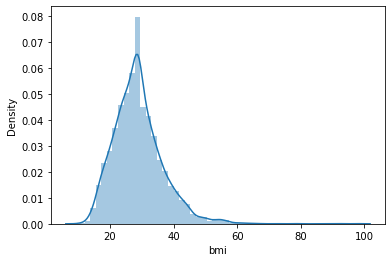

Skewness of stroke is 4.193284486071313


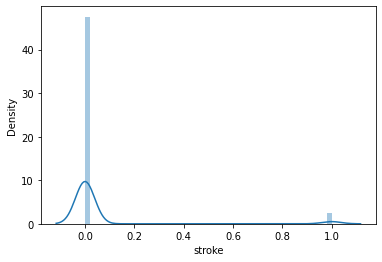

In [18]:
for i in numdata:
    print(f"Skewness of {i} is {df[i].skew()}")
    plt.figure()
    sns.distplot(df[i])
    plt.show()

In [19]:
df.corr()["stroke"].sort_values()

id                   0.006388
bmi                  0.038947
hypertension         0.127904
avg_glucose_level    0.131945
heart_disease        0.134914
age                  0.245257
stroke               1.000000
Name: stroke, dtype: float64

In [20]:
df.corr()["stroke"].sort_values()

id                   0.006388
bmi                  0.038947
hypertension         0.127904
avg_glucose_level    0.131945
heart_disease        0.134914
age                  0.245257
stroke               1.000000
Name: stroke, dtype: float64

In [21]:
df["stroke"]=np.sqrt(df["stroke"])
df["bmi"]=np.log(df["bmi"])
df["avg_glucose_level"]=np.log(df["avg_glucose_level"])
df["heart_disease"]=np.sqrt(df["heart_disease"])
df["hypertension"]=np.sqrt(df["hypertension"])

Skewness of id is -0.019912979190701046


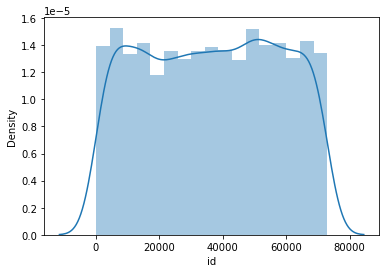

Skewness of age is -0.1370593225984694


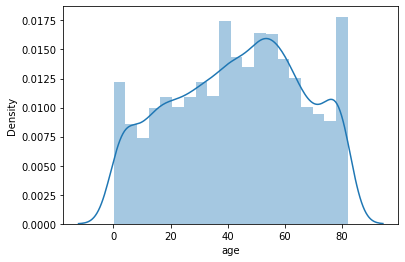

Skewness of hypertension is 2.7153916581245294


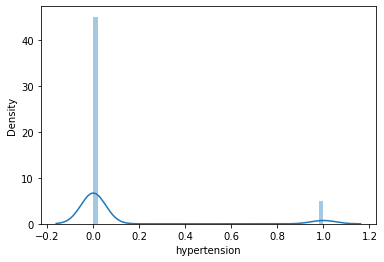

Skewness of heart_disease is 3.947243966661894


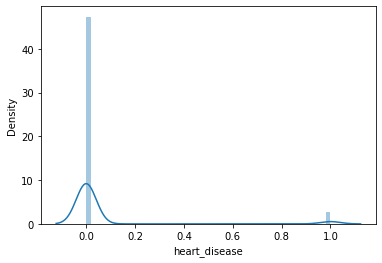

Skewness of avg_glucose_level is 0.8827511014266456


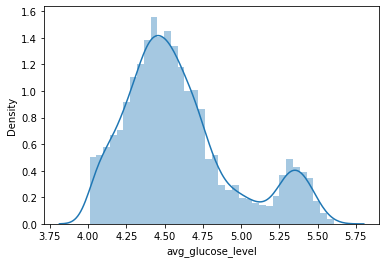

Skewness of bmi is -0.01473042522047736


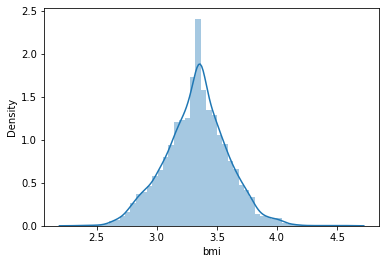

Skewness of stroke is 4.193284486071313


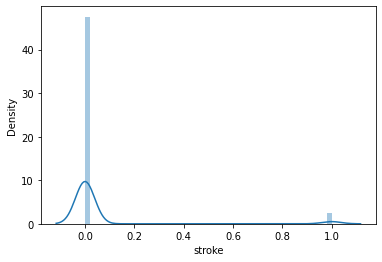

In [22]:
for i in numdata:
    print(f"Skewness of {i} is {df[i].skew()}")
    plt.figure()
    sns.distplot(df[i])
    plt.show()

##### There is not that much improvement after dealing with the skewness

## Visualisation

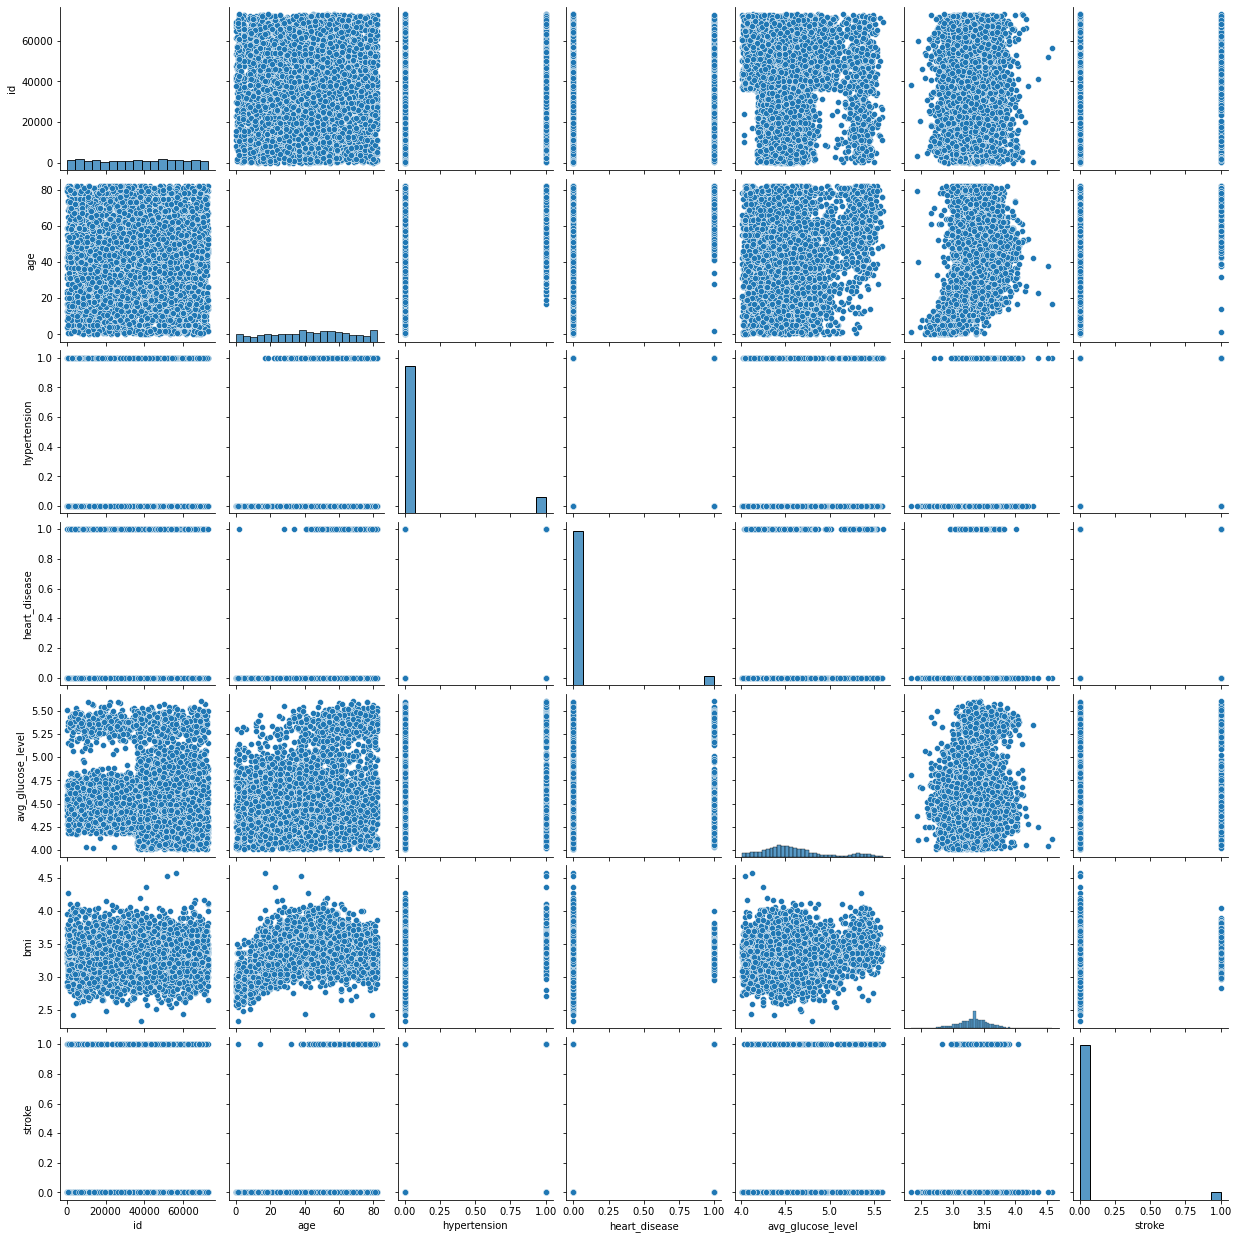

In [64]:
sns.pairplot(df)
plt.show()

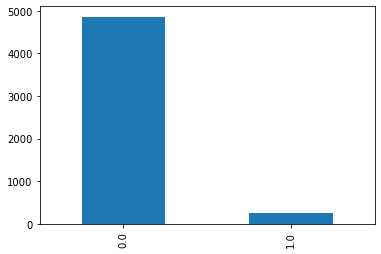

In [65]:
df["stroke"].value_counts().plot(kind="bar")
plt.show()

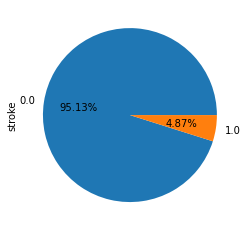

In [67]:
df["stroke"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

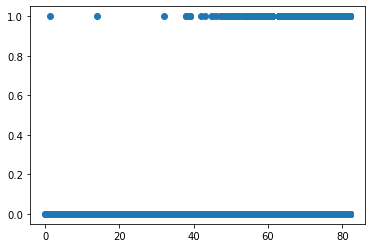

In [26]:
plt.scatter(df["age"],df["stroke"])

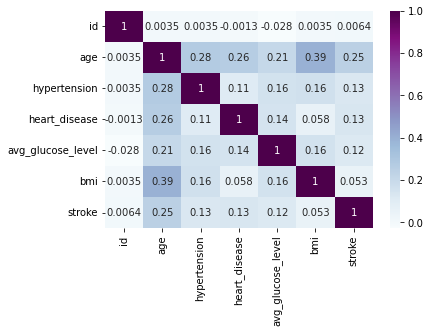

In [27]:
sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.show()

### Seperating Features and Target

### x-> Features
### y->Target

In [28]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [29]:
x

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046.0,Male,67.0,0.0,1.0,Yes,Private,Urban,5.432367,3.600048,formerly smoked
1,51676.0,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,5.309307,3.363608,never smoked
2,31112.0,Male,80.0,0.0,1.0,Yes,Private,Rural,4.662684,3.481240,never smoked
3,60182.0,Female,49.0,0.0,0.0,Yes,Private,Urban,5.143008,3.538057,smokes
4,1665.0,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,5.159745,3.178054,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,Female,80.0,1.0,0.0,Yes,Private,Urban,4.427836,3.363608,never smoked
5106,44873.0,Female,81.0,0.0,0.0,Yes,Self-employed,Urban,4.829912,3.688879,never smoked
5107,19723.0,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,4.418720,3.421000,never smoked
5108,37544.0,Male,51.0,0.0,0.0,Yes,Private,Rural,5.113733,3.242592,formerly smoked


In [30]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5105    0.0
5106    0.0
5107    0.0
5108    0.0
5109    0.0
Name: stroke, Length: 5110, dtype: float64

## Encoding

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
oe=OrdinalEncoder()

In [33]:
oe.fit_transform(x[["gender","ever_married","work_type","Residence_type","smoking_status"]])

array([[1., 1., 2., 1., 1.],
       [0., 1., 3., 0., 2.],
       [1., 1., 2., 0., 2.],
       ...,
       [0., 1., 3., 0., 2.],
       [1., 1., 2., 0., 1.],
       [0., 1., 0., 1., 0.]])

In [34]:
catcol=x.select_dtypes(object).columns

In [35]:
catcol

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [36]:
x[catcol]=oe.fit_transform(x[catcol])

In [37]:
x

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046.0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,5.432367,3.600048,1.0
1,51676.0,0.0,61.0,0.0,0.0,1.0,3.0,0.0,5.309307,3.363608,2.0
2,31112.0,1.0,80.0,0.0,1.0,1.0,2.0,0.0,4.662684,3.481240,2.0
3,60182.0,0.0,49.0,0.0,0.0,1.0,2.0,1.0,5.143008,3.538057,3.0
4,1665.0,0.0,79.0,1.0,0.0,1.0,3.0,0.0,5.159745,3.178054,2.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,0.0,80.0,1.0,0.0,1.0,2.0,1.0,4.427836,3.363608,2.0
5106,44873.0,0.0,81.0,0.0,0.0,1.0,3.0,1.0,4.829912,3.688879,2.0
5107,19723.0,0.0,35.0,0.0,0.0,1.0,3.0,0.0,4.418720,3.421000,2.0
5108,37544.0,1.0,51.0,0.0,0.0,1.0,2.0,0.0,5.113733,3.242592,1.0


## Training my Model

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
from sklearn.metrics import classification_report,accuracy_score

In [41]:
def mymodel(model):
    
    #Model Creation
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    #Checkeing Bais and Variance
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"Training Acuuracy:- {train}\n Testing Accuracy:- {test}")
    
    #Model Evaluation
    
    print(classification_report(ytest,ypred))
    return model

In [42]:
lg=mymodel(LogisticRegression())

Training Acuuracy:- 0.9535923958624546
 Testing Accuracy:- 0.9458577951728636
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1450
         1.0       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [43]:
sv=mymodel(SVC())

Training Acuuracy:- 0.9535923958624546
 Testing Accuracy:- 0.9458577951728636
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1450
         1.0       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [44]:
knn=mymodel(KNeighborsClassifier())

Training Acuuracy:- 0.9541515236231479
 Testing Accuracy:- 0.9465101108936725
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1450
         1.0       1.00      0.01      0.02        83

    accuracy                           0.95      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.95      0.92      1533



In [49]:
dt=mymodel(DecisionTreeClassifier())

Training Acuuracy:- 1.0
 Testing Accuracy:- 0.9099804305283757
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1450
         1.0       0.16      0.16      0.16        83

    accuracy                           0.91      1533
   macro avg       0.56      0.55      0.56      1533
weighted avg       0.91      0.91      0.91      1533



######  Let us check what is the accuracy of the dataset after scaling it.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [46]:
lg=mymodel(LogisticRegression())

Training Acuuracy:- 0.9535923958624546
 Testing Accuracy:- 0.9458577951728636
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1450
         1.0       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [47]:
sv=mymodel(SVC())

Training Acuuracy:- 0.9535923958624546
 Testing Accuracy:- 0.9458577951728636
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1450
         1.0       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [48]:
knn=mymodel(KNeighborsClassifier())

Training Acuuracy:- 0.9541515236231479
 Testing Accuracy:- 0.9465101108936725
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1450
         1.0       1.00      0.01      0.02        83

    accuracy                           0.95      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.95      0.92      1533



In [50]:
dt=mymodel(DecisionTreeClassifier())

Training Acuuracy:- 1.0
 Testing Accuracy:- 0.9119373776908023
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1450
         1.0       0.17      0.16      0.16        83

    accuracy                           0.91      1533
   macro avg       0.56      0.56      0.56      1533
weighted avg       0.91      0.91      0.91      1533



##### So here after applying Decision Tree we can observe that there is a little bit improvement in Decision Tree Classifier model and looking at other algorithms there is no change in the accuracy after and before scaling .

## Hyperparameter Tuning:Grid Search Cv

In [51]:
list(range(1,100,5))

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]

In [52]:
parameter = {
    
            "criterion":["gini","entropy"],
            "max_depth":list(range(1,50,5)),
            "min_samples_leaf":list(range(1,50,5))
            
}

In [53]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(),parameter,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46]},
             verbose=2)

In [60]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}

In [61]:
grid.best_score_

0.9535926085088097

In [62]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [63]:
dt= mymodel(grid.best_estimator_)

Training Acuuracy:- 0.9535923958624546
 Testing Accuracy:- 0.9458577951728636
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1450
         1.0       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



##### So here after applying Gridsearch CV we can see that our model is giving a good accuracy score and training ,testing score is also good.

### Conclusion: We can observe that in the given dataset after applying all the models we can conclude that KNN is giving the best Result and after training the model we can say that it is giving pretty much accurate result and my model is working good.